In [1]:
import os, sys, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from settings import DATA_PATH, RESULTS_PATH

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.plots import params_in_last_n_samples, plot_data
from scripts.experiments import do_experiment
from models.compare_next_batches_analyser import CompareNextBatchesAnalyser

In [2]:
df_results = pd.read_csv(os.path.join(RESULTS_PATH, "compare_next_batches.csv"))
df_results

,series,window_size,mean_threshold,std_threshold,latency_sum,min_latencies,avg_min_latency,num_pred_chages
0,series1.csv,10,0.05,0.05,1559110,[0 0 0],0.0,908
1,series1.csv,10,0.05,0.10,1452430,[0 0 0],0.0,852
2,series1.csv,10,0.05,0.20,1347280,[0 0 0],0.0,779
3,series1.csv,10,0.05,0.30,1316440,[0 0 0],0.0,763
4,series1.csv,10,0.05,0.50,1312530,[0 0 0],0.0,759
...,...,...,...,...,...,...,...,...
535,series3.csv,1000,1.00,0.10,0,[0],0.0,1
536,series3.csv,1000,1.00,0.20,0,[0],0.0,1
537,series3.csv,1000,1.00,0.30,0,[0],0.0,1
538,series3.csv,1000,1.00,0.50,0,[0],0.0,1


In [3]:
series = df_results["series"].unique()

In [4]:
def get_good_results(df):
    df = df[df["avg_min_latency"] < 3300]
    df = df[df["latency_sum"] == df["latency_sum"].min()]
    return df

## Series 1

In [5]:
df = df_results[df_results["series"] == "series1.csv"]
get_good_results(df)

,series,window_size,mean_threshold,std_threshold,latency_sum,min_latencies,avg_min_latency,num_pred_chages
151,series1.csv,1000,0.1,0.1,500,[ 0 300 200],166.666667,3
152,series1.csv,1000,0.1,0.2,500,[ 0 300 200],166.666667,3
153,series1.csv,1000,0.1,0.3,500,[ 0 300 200],166.666667,3
154,series1.csv,1000,0.1,0.5,500,[ 0 300 200],166.666667,3
155,series1.csv,1000,0.1,1.0,500,[ 0 300 200],166.666667,3
157,series1.csv,1000,0.2,0.1,500,[ 0 300 200],166.666667,3


,start_index,mean,std
0,0,1.285705,0.322552
1,3000,1.475154,0.435450
2,6000,1.768792,0.411779


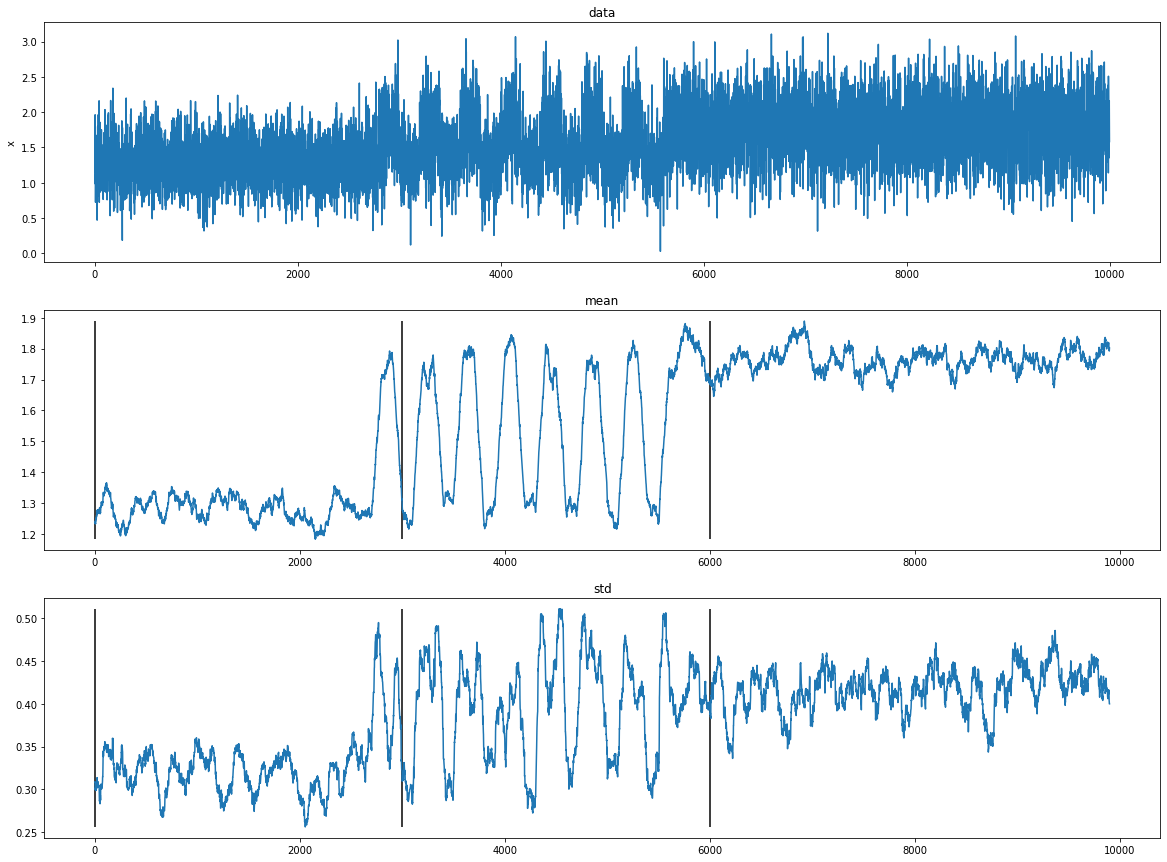

In [6]:
df_data = pd.read_csv(os.path.join(DATA_PATH, "series1.csv"))
model = CompareNextBatchesAnalyser(window_size=1000, mean_threshold=0.1, std_threshold=0.1)
distributions = do_experiment(df_data.x, model)
plot_data(df_data, window_size=100, vlines=distributions["start_index"])
distributions

#### window size = 100

In [7]:
df = df_results[df_results["series"] == "series1.csv"]
get_good_results(df[df["window_size"] == 100])

,series,window_size,mean_threshold,std_threshold,latency_sum,min_latencies,avg_min_latency,num_pred_chages
79,series1.csv,100,0.1,0.1,25700,[ 0 100 0],33.333333,23
80,series1.csv,100,0.1,0.2,25700,[ 0 100 0],33.333333,23
81,series1.csv,100,0.1,0.3,25700,[ 0 100 0],33.333333,23
82,series1.csv,100,0.1,0.5,25700,[ 0 100 0],33.333333,23
83,series1.csv,100,0.1,1.0,25700,[ 0 100 0],33.333333,23


,start_index,mean,std
0,0,1.238637,0.308834
1,100,1.346104,0.349489
2,300,1.194251,0.318824
3,400,1.311695,0.308177
4,2800,1.715510,0.434285
5,3000,1.279395,0.309475
6,3200,1.740668,0.438334
7,3400,1.293221,0.336348
8,3600,1.777130,0.425814
9,3800,1.226509,0.337892


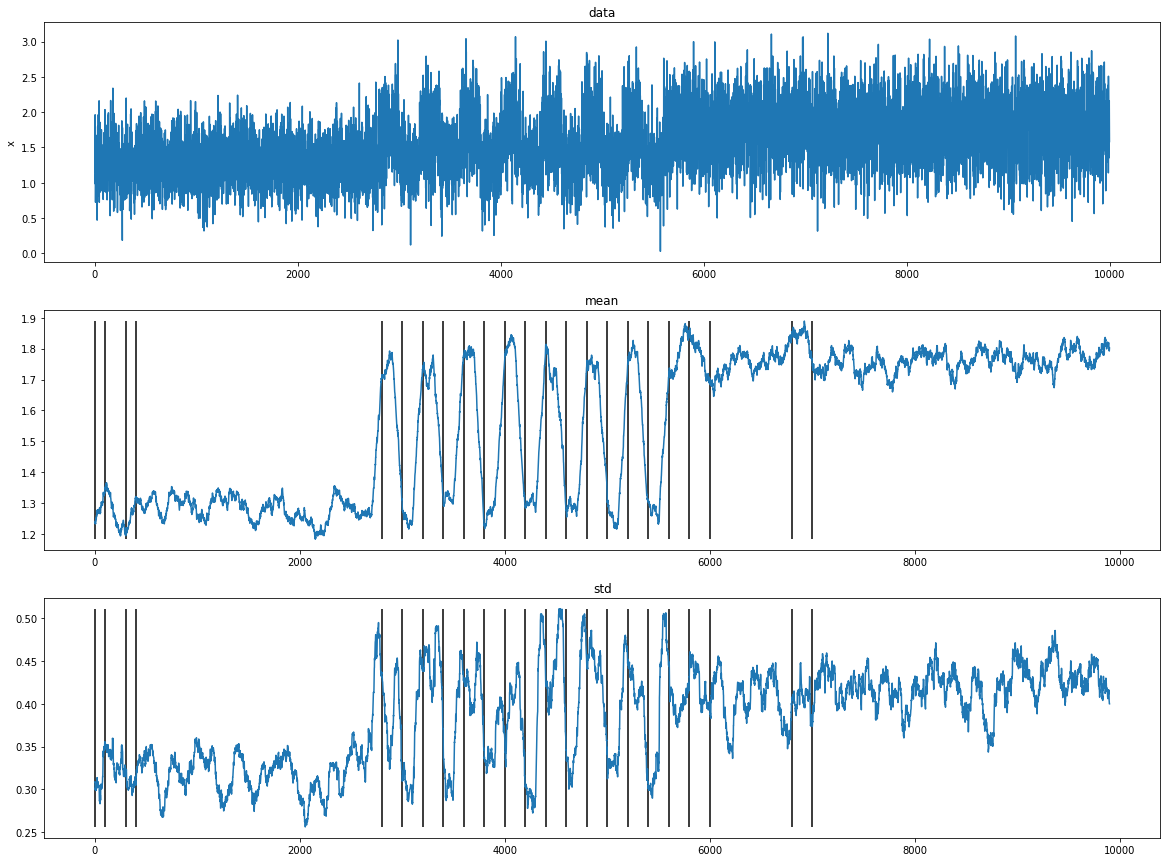

In [8]:
df_data = pd.read_csv(os.path.join(DATA_PATH, "series1.csv"))
model = CompareNextBatchesAnalyser(window_size=100, mean_threshold=0.1, std_threshold=0.1)
distributions = do_experiment(df_data.x, model)
plot_data(df_data, window_size=100, vlines=distributions["start_index"])
distributions

## Series 2

In [9]:
df = df_results[df_results["series"] == "series2.csv"]
get_good_results(df)

,series,window_size,mean_threshold,std_threshold,latency_sum,min_latencies,avg_min_latency,num_pred_chages
342,series2.csv,1000,0.3,0.05,400,[ 0 200 200],133.333333,3


,start_index,mean,std
0,0,0.961672,0.204921
1,3000,1.085056,0.300844
2,6000,1.396428,0.297630


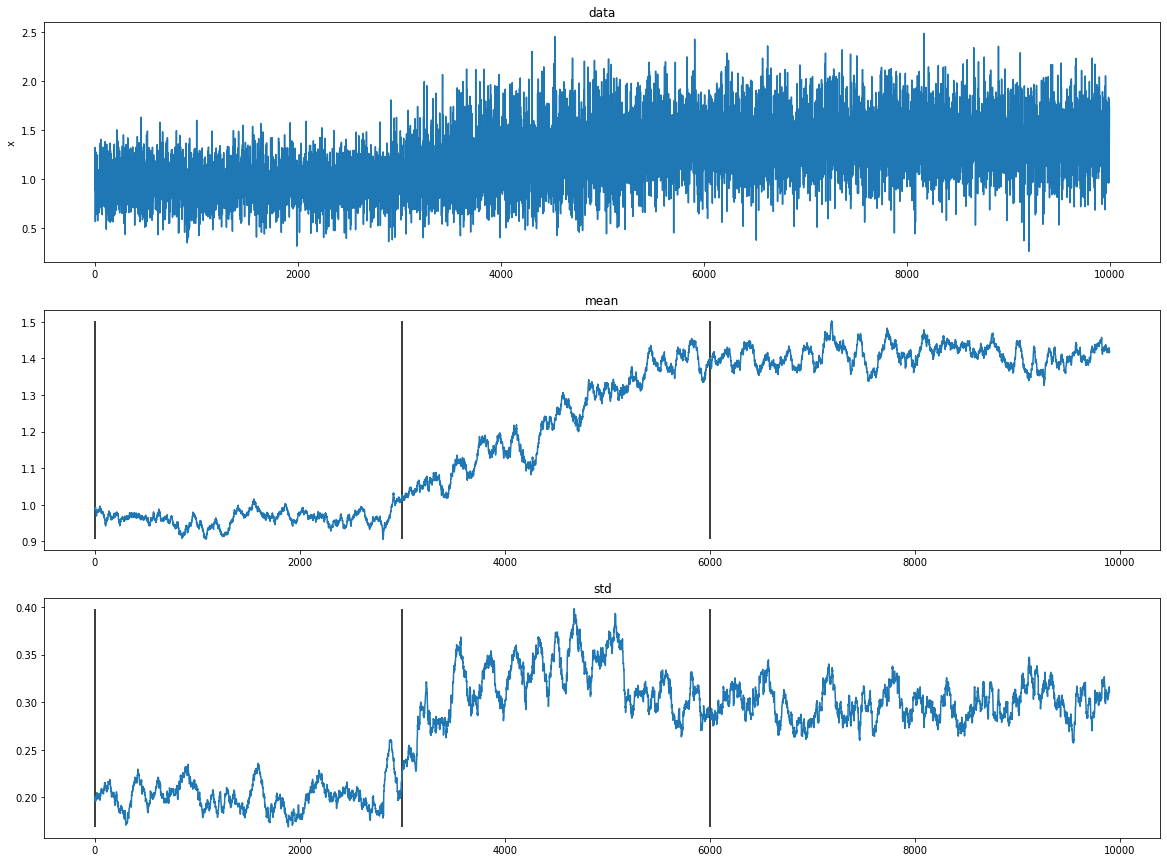

In [16]:
df_data = pd.read_csv(os.path.join(DATA_PATH, "series2.csv"))
model = CompareNextBatchesAnalyser(window_size=1000, mean_threshold=0.3, std_threshold=0.05)
distributions = do_experiment(df_data.x, model)
plot_data(df_data, window_size=100, vlines=distributions["start_index"])
distributions

In [11]:
df = df_results[df_results["series"] == "series2.csv"]
df = df[df["window_size"] == 100]
df = df[df["latency_sum"] == df["latency_sum"].min()]
df

,series,window_size,mean_threshold,std_threshold,latency_sum,min_latencies,avg_min_latency,num_pred_chages
276,series2.csv,100,0.5,0.05,6800,[ 0 100 1100],400.0,7
282,series2.csv,100,1.0,0.05,6800,[ 0 100 1100],400.0,7


,start_index,mean,std
0,0,0.987104,0.196924
1,2900,0.996492,0.249659
2,3500,1.107076,0.331617
3,6900,1.397038,0.269238
4,7200,1.461908,0.328544
5,7300,1.442225,0.274109
6,7800,1.436201,0.326268


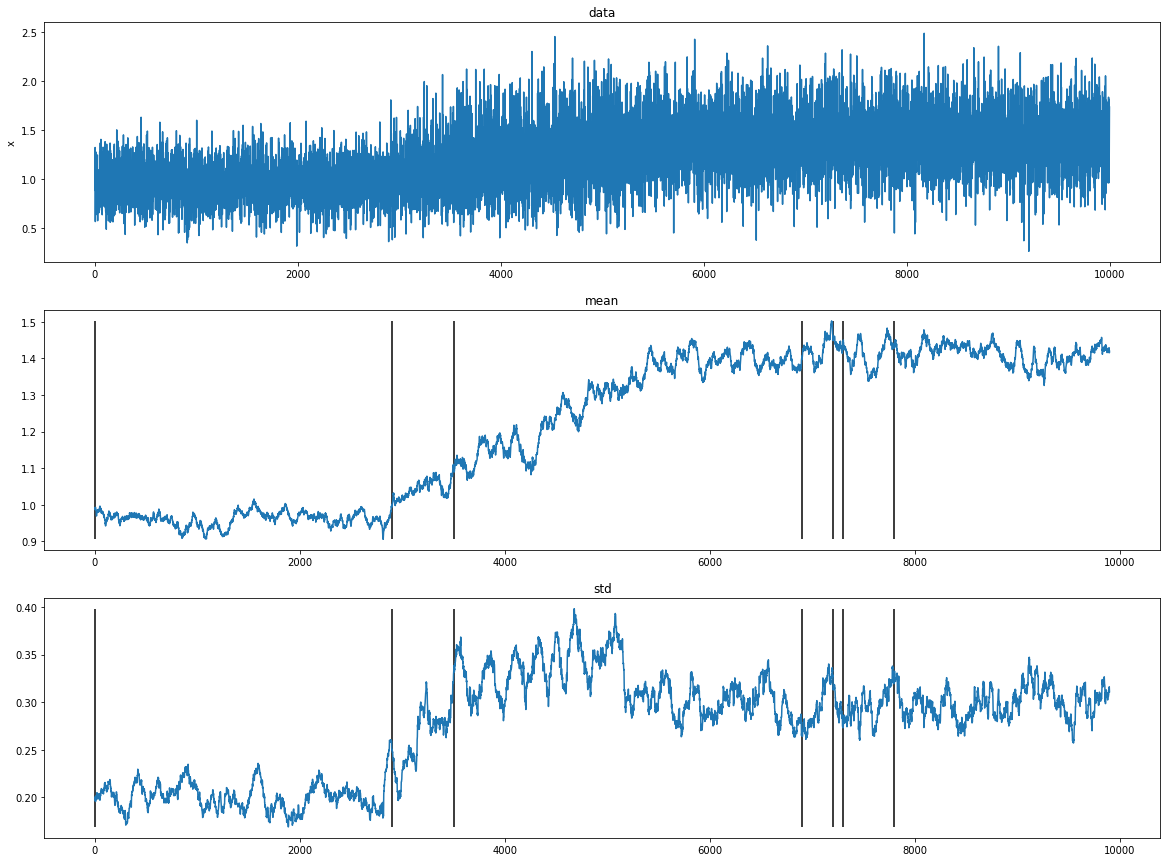

In [17]:
df_data = pd.read_csv(os.path.join(DATA_PATH, "series2.csv"))
model = CompareNextBatchesAnalyser(window_size=100, mean_threshold=0.5, std_threshold=0.05)
distributions = do_experiment(df_data.x, model)
plot_data(df_data, window_size=100, vlines=distributions["start_index"])
distributions

## Series 3

In [18]:
df = df_results[df_results["series"] == "series3.csv"]
get_good_results(df)

,series,window_size,mean_threshold,std_threshold,latency_sum,min_latencies,avg_min_latency,num_pred_chages
395,series3.csv,10,1.0,1.0,0,[0],0.0,1
424,series3.csv,50,0.5,0.5,0,[0],0.0,1
425,series3.csv,50,0.5,1.0,0,[0],0.0,1
430,series3.csv,50,1.0,0.5,0,[0],0.0,1
431,series3.csv,50,1.0,1.0,0,[0],0.0,1
...,...,...,...,...,...,...,...,...
535,series3.csv,1000,1.0,0.1,0,[0],0.0,1
536,series3.csv,1000,1.0,0.2,0,[0],0.0,1
537,series3.csv,1000,1.0,0.3,0,[0],0.0,1
538,series3.csv,1000,1.0,0.5,0,[0],0.0,1


,start_index,mean,std
0,0,0.384614,0.769271


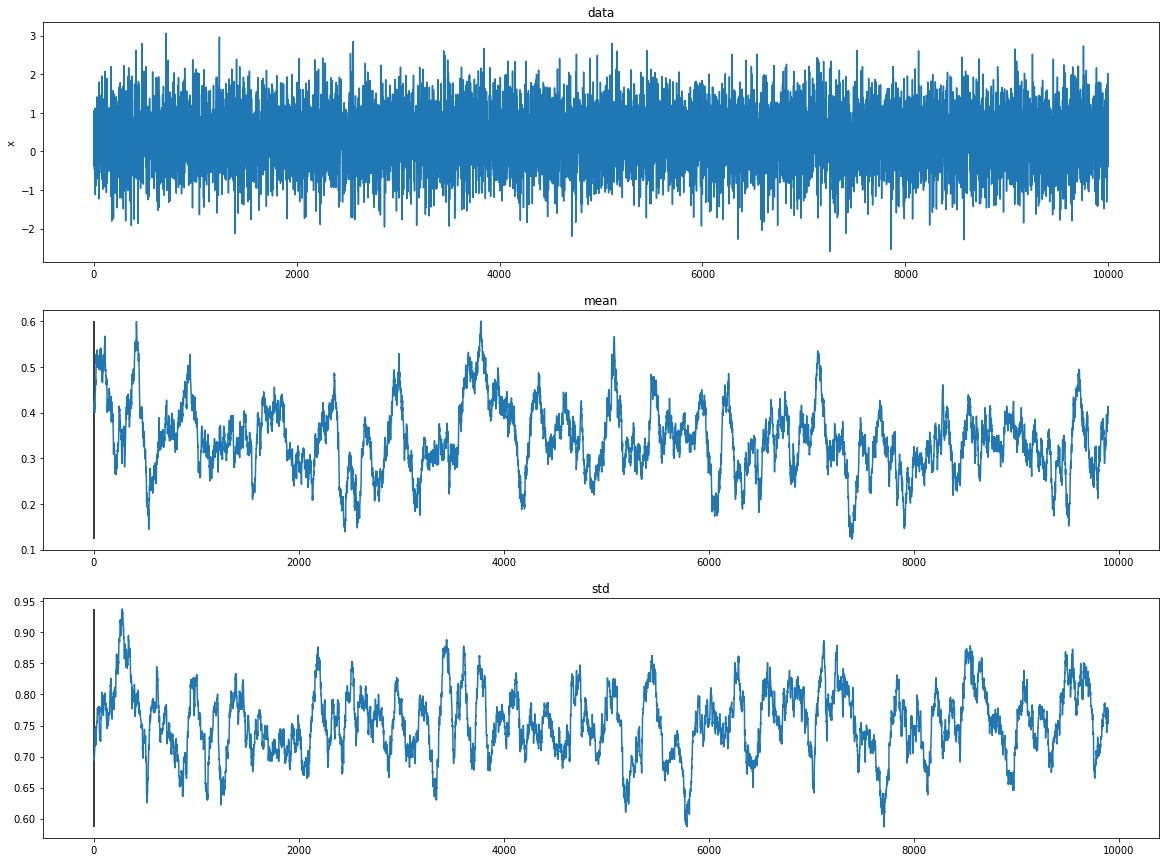

In [14]:
df_data = pd.read_csv(os.path.join(DATA_PATH, "series3.csv"))
model = CompareNextBatchesAnalyser(window_size=1000, mean_threshold=0.1, std_threshold=0.1)
distributions = do_experiment(df_data.x, model)
plot_data(df_data, window_size=100, vlines=distributions["start_index"])
distributions

## Wnioski

- Metoda, mimo że dosć prosta, przy odpowiednim dobrze hiperparametrów pozwala na poprawne wykrycie zmian rozkładu.
- Zbyt mały rozmiar okna, powoduje że są wykrywane nieistniejące zmiany rozkładu.
- Metoda radzi sobie bardzo dobrze z trzecią serią danych, w zasadzie dla wszystkich sprawdzonych zestawów hiperparametrów.
- Zbyt duże okno powoduje, że predykcja wykrycia miejsca zmiany rozkładu jej mniej dokładna.